#  Entity Explorer - Domain and URL
**Notebook Version:** 1.0<br>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Description:" data-toc-modified-id="Description:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Description:</a></span><ul class="toc-item"><li><span><a href="#Notebook-Setup" data-toc-modified-id="Notebook-Setup-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Notebook Setup</a></span></li><li><span><a href="#Get-WorkspaceId-and-Authenticate-to-Log-Analytics" data-toc-modified-id="Get-WorkspaceId-and-Authenticate-to-Log-Analytics-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Get WorkspaceId and Authenticate to Log Analytics</a></span></li></ul></li><li><span><a href="#Select-the-domain-or-URL-you-wish-to-investigate" data-toc-modified-id="Select-the-domain-or-URL-you-wish-to-investigate-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Select the domain or URL you wish to investigate</a></span></li><li><span><a href="#Domain-Overview" data-toc-modified-id="Domain-Overview-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Domain Overview</a></span><ul class="toc-item"><li><span><a href="#Threat-Intelligence" data-toc-modified-id="Threat-Intelligence-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Threat Intelligence</a></span></li><li><span><a href="#Domain-analysis" data-toc-modified-id="Domain-analysis-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Domain analysis</a></span></li><li><span><a href="#TLS-Cert-Details" data-toc-modified-id="TLS-Cert-Details-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>TLS Cert Details</a></span></li><li><span><a href="#Reverse-DNS-details" data-toc-modified-id="Reverse-DNS-details-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Reverse DNS details</a></span></li><li><span><a href="#Site-Screenshot" data-toc-modified-id="Site-Screenshot-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Site Screenshot</a></span></li><li><span><a href="#Domain-Summary" data-toc-modified-id="Domain-Summary-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Domain Summary</a></span></li></ul></li><li><span><a href="#Related-Alerts" data-toc-modified-id="Related-Alerts-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Related Alerts</a></span></li><li><span><a href="#Domain-or-URL-in-Logs" data-toc-modified-id="Domain-or-URL-in-Logs-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Domain or URL in Logs</a></span><ul class="toc-item"><li><span><a href="#Host-Logs" data-toc-modified-id="Host-Logs-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Host Logs</a></span></li><li><span><a href="#Network-Device-Logs" data-toc-modified-id="Network-Device-Logs-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Network Device Logs</a></span></li><li><span><a href="#DNS-Logs" data-toc-modified-id="DNS-Logs-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>DNS Logs</a></span></li><li><span><a href="#Flow-Logs" data-toc-modified-id="Flow-Logs-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Flow Logs</a></span></li><li><span><a href="#All-Hosts-Observed-Communicating-with-the-Domain-or-URL" data-toc-modified-id="All-Hosts-Observed-Communicating-with-the-Domain-or-URL-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>All Hosts Observed Communicating with the Domain or URL</a></span></li></ul></li><li><span><a href="#Summary-of-Findings" data-toc-modified-id="Summary-of-Findings-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Summary of Findings</a></span></li><li><span><a href="#Setup-Cell" data-toc-modified-id="Setup-Cell-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Setup Cell</a></span></li></ul></div>

## Description:
This Notebooks brings together a series of tools and techniques to enable threat hunting within the context of a domain name or URL that has been identified as of interest. It provides a series of techniques to assist in determining whether a domain or URL is malicious. Once this has been established it provides an overview of the scope of the domain or URL across an environment, along with indicators of areas for further investigation such as hosts of interest.  

**Data Sources Used**:
- Log Analytics/Azure Sentinel
    - Syslog (Optional)
    - SecurityEvent (Optional)
    - DnsEvents (Optional)
    - CommonSecurityLog (Optional)
    - AzureNetworkAnalytics_CL (Optional)

- Threat Intelligence Providers
    - OTX (https://otx.alienvault.com/)
    - VirusTotal (https://www.virustotal.com/)
    - XForce (https://www.ibm.com/security/xforce)
 

# Hunting Hypothesis: 
Our broad initial hunting hypothesis is that a particular domain or URL is controlled by an attacker and used maliciously. We wish to validate this hypothesis and identify any impact to our environment based on this.

Before you start hunting please run the setup cells at the bottom of this Notebook. 

### Notebook Setup
&lt;details&gt;
    <summary> <u>Details...</u></summary>
        If this is your first time running this Notebook please run the cells in in the <a>Setup</a> section before proceeding  to ensure you have the required packages installed correctly. Similarly if you see any import failures (```ImportError```) in the notebook, please make sure that you have run the [Setup](#setup) section first.
    &lt;/details&gt;

In [14]:
# !pip install --index-url https://test.pypi.org/simple/ --extra-index-url https://pypi.org/simple --no-cache-dir msticpy==0.2.7
# !pip install pyvis --upgrade --user
!pip install python-whois --upgrade --user

     |████████████████████████████████| 92kB 3.9MB/s eta 0:00:01
  Created wheel for python-whois: filename=python_whois-0.7.2-cp36-none-any.whl size=86215 sha256=3bff786b45f5f648ad7eedcaee297b33fd8a09289867c0fa4788a511a3d0952d
  Stored in directory: /home/nbuser/.cache/pip/wheels/69/e6/62/1e6a746ca8e690f472611511b6948c325b232aaf693245ce46
Successfully built python-whois
You should consider upgrading via the 'pip install --upgrade pip' command.


In [7]:
print('Importing python packages....')
import sys
import warnings
MIN_REQ_PYTHON = (3,6)
if sys.version_info < MIN_REQ_PYTHON:
    print('Check the Kernel->Change Kernel menu and ensure that Python 3.6')
    print('or later is selected as the active kernel.')
    sys.exit("Python %s.%s or later is required.\n" % MIN_REQ_PYTHON)
    
import re
import json
import numpy as np
import time
import requests
import seaborn as sns
sns.set()
import ipywidgets as widgets
import pandas as pd
print('Importing msticpy packages...')
from msticpy.sectools import *
from msticpy.nbtools import *
from msticpy.nbtools.utility import md
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_colwidth', 100)
WIDGET_DEFAULTS = {'layout': widgets.Layout(width="900px"),
                   'style': {'description_width': 'initial'}}
from pyvis.network import Network
from IPython.display import Image, Markdown, HTML
from msticpy.data.data_providers import QueryProvider
from msticpy.sectools import tilookup
tilookup = TILookup()
from msticpy.nbtools.utility import md, md_warn
from msticpy.sectools import domain_utils
from msticpy.nbtools import observationlist

from matplotlib import MatplotlibDeprecationWarning
warnings.simplefilter("ignore", category=MatplotlibDeprecationWarning)
pd.options.mode.chained_assignment = None

print('Imports complete')

Importing python packages....
Importing msticpy packages...
Imports complete


### Get WorkspaceId and Authenticate to Log Analytics
&lt;details&gt;
    <summary> <u>Details...</u></summary>
If you are using user/device authentication, run the following cell. 
- Click the 'Copy code to clipboard and authenticate' button.
- This will pop up an Azure Active Directory authentication dialog (in a new tab or browser window). The device code will have been copied to the clipboard. 
- Select the text box and paste (Ctrl-V/Cmd-V) the copied value. 
- You should then be redirected to a user authentication page where you should authenticate with a user account that has permission to query your Log Analytics workspace.

Use the following syntax if you are authenticating using an Azure Active Directory AppId and Secret:
```
%kql loganalytics://tenant(aad_tenant).workspace(WORKSPACE_ID).clientid(client_id).clientsecret(client_secret)
```
instead of
```
%kql loganalytics://code().workspace(WORKSPACE_ID)
```

Note: you may occasionally see a JavaScript error displayed at the end of the authentication - you can safely ignore this.<br>
On successful authentication you should see a ```popup schema``` button.
To find your Workspace Id go to [Log Analytics](https://ms.portal.azure.com/#blade/HubsExtension/Resources/resourceType/Microsoft.OperationalInsights%2Fworkspaces). Look at the workspace properties to find the ID.
&lt;/details&gt;

In [8]:
#See if we have an Azure Sentinel Workspace defined in our config file, if not let the user specify Workspace and Tenant IDs
from msticpy.nbtools.wsconfig import WorkspaceConfig
ws_config = WorkspaceConfig()
try:
    ws_id = ws_config['workspace_id']
    ten_id = ws_config['tenant_id']
    config = True
    display(HTML("Workspace details collected from config file"))
except KeyError:
    md(('Please go to your Log Analytics workspace, copy the workspace ID'
                 ' and/or tenant Id and paste here to enable connection to the workspace and querying of it..<br> '))
    ws_id_wgt = nbwidgets.GetEnvironmentKey(env_var='WORKSPACE_ID',
                                        prompt='Please enter your Log Analytics Workspace Id:', auto_display=True)
    ten_id_wgt = nbwidgets.GetEnvironmentKey(env_var='TENANT_ID',
                                         prompt='Please enter your Log Analytics Tenant Id:', auto_display=True)
    config = False


Please wait. Loading Kqlmagic extension...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


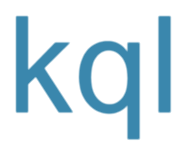

<IPython.core.display.Javascript object>

In [9]:
if config is False:
    ws_id = ws_id_wgt.value
    ten_id = ten_id_wgt.value
# Establish a query provider for Azure Sentinel and connect to it
qry_prov = QueryProvider('LogAnalytics')
la_connection_string = f'loganalytics://code().tenant("{ten_id}").workspace("{ws_id}")'
qry_prov.connect(connection_str=f'{la_connection_string}')

#### Authentication and Configuration Problems

<br>
<details>
    <summary>Click for details about configuring your authentication parameters</summary>
    
The notebook is expecting your Azure Sentinel Tenant ID and Workspace ID to be configured in one of the following places:
- `config.json` in the current folder
- `msticpyconfig.yaml` in the current folder or location specified by `MSTICPYCONFIG` environment variable.
    
For help with setting up your `config.json` file (if this hasn't been done automatically) see the [`ConfiguringNotebookEnvironment`](https://github.com/Azure/Azure-Sentinel-Notebooks/blob/master/ConfiguringNotebookEnvironment.ipynb) notebook in the root folder of your Azure-Sentinel-Notebooks project. This shows you how to obtain your Workspace and Subscription IDs from the Azure Sentinel Portal. You can use the SubscriptionID to find your Tenant ID). To view the current `config.json` run the following in a code cell.

```%pfile config.json```

For help with setting up your `msticpyconfig.yaml` see the [Setup](#Setup) section at the end of this notebook and the [ConfigureNotebookEnvironment notebook](https://github.com/Azure/Azure-Sentinel-Notebooks/blob/master/ConfiguringNotebookEnvironment.ipynb)
</details>

## Select the domain or URL you wish to investigate
Enter the domain or URL you wish to investigate.

In [68]:
domain_url = widgets.Text(description='Please enter your the domain or URL to investigate:',
                          **WIDGET_DEFAULTS)
display(domain_url)
#                                          auto_display=True)

Text(value='', description='Please enter your the domain or URL to investigate:', layout=Layout(width='900px')…

In [88]:
import tldextract
graph_items = []
dom_val = domain_utils.DomainValidator()
summary = observationlist.Observations()
dom_record = None
url=domain_url.value.strip().lower()
_, domain, tld = tldextract.extract(domain_url.value)
domain = domain.lower() + "." + tld.lower()
if dom_val.validate_tld(domain) is not True:
    md(f"{domain} is not a valid domain name", "bold")

if url != domain:
    md(f"<strong>Domain</strong> : {domain}")
    md(f"<strong>URL</strong> : {url}")
    graph_items.append((domain,url))
else:
    md(f"<strong>Domain</strong> : {domain}")
    url = None

<p style=''><strong>Domain</strong> : amazon.com</p>

<p style=''><strong>URL</strong> : https://amazon.com</p>

If you are certain the above indicators are malicious and wish to jump straight to investigating thier scope of impact in the environment jump to <a>Related Alerts</a>.

## Domain Overview

### Threat Intelligence
As a first step we want to establish if this domain or URL is known to to be malicious by our Threat Intelligence providers.

In [71]:
domain_ti = tilookup.result_to_df(tilookup.lookup_ioc(observable=domain, ioc_type='dns'))
if url is not None:
    url_ti = tilookup.result_to_df(tilookup.lookup_ioc(observable=url, ioc_type='url'))
    md(f"Threat Intelligence Results for {url}", "bold")
    display(url_ti.T)
    summary.add_observation(caption="URL TI", description=f"Summary of TI for {url}", data=url_ti)
    graph_items += [((url,provider)) for provider in url_ti.index if url_ti.loc[provider]['Severity'] > 0] 
md(f"Threat Intelligence Results for {domain}", "bold")
display(domain_ti.T)
summary.add_observation(caption="Domain TI", description=f"Summary of TI for {domain}", data=domain_ti)
graph_items += [((domain,provider)) for provider in domain_ti.index if domain_ti.loc[provider]['Severity'] > 0]

<p style='font-weight: bold'>Threat Intelligence Results for https://ohyaya.raiseyourdongers.pw/</p>

,OTX,XForce,VirusTotal
Ioc,https://ohyaya.raiseyourdongers.pw/,https://ohyaya.raiseyourdongers.pw/,https://ohyaya.raiseyourdongers.pw/
IocType,url,url,url
QuerySubtype,None,None,None
Provider,OTX,XForce,VirusTotal
Result,True,True,False
Severity,0,0,0
Details,"{'pulse_count': 0, 'sections_available': ['general', 'url_list', 'http_scans']}","{'score': 0, 'cats': None, 'categoryDescriptions': None, 'reason': None, 'reasonDescription': 0,...",Request forbidden. Allowed query rate may have been exceeded.
RawResult,"{'indicator': 'https://ohyaya.raiseyourdongers.pw', 'alexa': 'http://www.alexa.com/siteinfo/rais...","{'result': {'url': 'raiseyourdongers.pw', 'cats': {'Malware': True, 'Botnet Command and Control ...",<Response [403]>
Reference,https://otx.alienvault.com/api/v1/indicators/url/https://ohyaya.raiseyourdongers.pw//general,https://api.xforce.ibmcloud.com/url/https://ohyaya.raiseyourdongers.pw/,https://www.virustotal.com/vtapi/v2/url/report
Status,0,0,403


<p style='font-weight: bold'>Threat Intelligence Results for raiseyourdongers.pw</p>

,OTX,XForce,VirusTotal
Ioc,raiseyourdongers.pw,raiseyourdongers.pw,raiseyourdongers.pw
IocType,dns,dns,dns
QuerySubtype,None,None,None
Provider,OTX,XForce,VirusTotal
Result,True,True,True
Severity,2,0,2
Details,"{'pulse_count': 3, 'names': ['SOAC_IOCS', 'Moobot and Fbot', 'Moobot and Fbot'], 'tags': [[], ['...","{'score': 0, 'cats': None, 'categoryDescriptions': None, 'reason': None, 'reasonDescription': 0,...","{'verbose_msg': 'Domain found in dataset', 'response_code': 1, 'detected_urls': ['https://raisey..."
RawResult,"{'indicator': 'raiseyourdongers.pw', 'alexa': 'http://www.alexa.com/siteinfo/raiseyourdongers.pw...","{'result': {'url': 'raiseyourdongers.pw', 'cats': {'Malware': True, 'Botnet Command and Control ...","{'undetected_referrer_samples': [], 'dns_records_date': 1572533321, 'detected_downloaded_samples..."
Reference,https://otx.alienvault.com/api/v1/indicators/domain/raiseyourdongers.pw/general,https://api.xforce.ibmcloud.com/url/raiseyourdongers.pw,https://www.virustotal.com/vtapi/v2/domain/report
Status,0,0,0


### Domain analysis
To build up a fuller picture of the domain we can use whois, and other data sources to gather pertinent data. Indicators such as registration data, domain entropy, and registration details can provide indicators that a domain is not legitimate in nature.

In [98]:
from whois import whois
from collections import Counter
def Entropy(data):
    s, lens = Counter(data), np.float(len(data))
    return -sum(count/lens * np.log2(count/lens) for count in s.values())
try:
    #Get a whis record for our domain
    wis = whois(domain)
    dom_record = pd.DataFrame({"Domain":[domain],
                                   "Name":[wis['name']],
                                   "Org":[wis['org']],
                                   "DNSSec":[wis['dnssec']],
                                   "City":[wis['city']],
                                   "State":[wis['state']],
                                   "Country":[wis['country']],
                                  "Registrar": [wis['registrar']],
                                  "Status": [wis['status']],
                                  "Created":[wis['creation_date']],
                                  "Expiration" : [wis['expiration_date']],
                                  "Last Updated" : [wis['updated_date']],
                                  "Name Servers": [wis['name_servers']]})
    ns_domains = []
    # Remove duplicate Name Server records
    for server in wis['name_servers']:
        ns_sub_d, ns_domain, ns_tld = tldextract.extract(server)
        ns_dom = ns_domain.lower() + "." + ns_tld.lower()
        if domain not in ns_domains:
                   ns_domains.append(ns_dom)                                            
    # Identity domains populatirty with Open Page Rank
    page_rank = tilookup.result_to_df(tilookup.lookup_ioc(observable=domain, providers=["OPR"]))
    page_rank_score = page_rank['RawResult'][0]['response'][0]['page_rank_integer']
    dom_record["Page Rank"] = [page_rank_score]
    # Get a list of subdomains for the domain
    url_ti = tilookup.result_to_df(tilookup.lookup_ioc(observable=domain, providers=["VirusTotal"]))
    sub_doms = url_ti['RawResult'][0]['subdomains']
    graph_items.append((domain, "Sub Domains"))
    graph_items += [(sub,"Sub Domains") for sub in sub_doms]
    dom_record['Sub Domains'] = [sub_doms]
    # Work out domain entropy to identity possible DGA
    dom_ent = Entropy(domain)
    dom_record['Domains Entropy'] = [dom_ent]
    # Add elements to graph for later plotting
    if isinstance(dom_record['Created'],list):                                                        
        graph_items.append((domain,dom_record['Created'][0][0]))
    else:
        graph_items.append((domain,dom_record['Created'][0]))
    graph_items.append((domain, "Name Servers"))
    graph_items += [(("Name Servers", ns)) for ns in dom_record['Name Servers'][0]]
    graph_items += [(domain,dom_record['Registrar'][0]), (domain,dom_record['Country'][0]),(domain,f"Page Rank : {dom_record['Page Rank'][0]}")]
    #TODO highlight recently register domains
    def color_cells(val):
        if isinstance(val, int):
            color = 'yellow' if val < 3 else 'white'
        elif isinstance(val, float):
            color = 'yellow' if val < (3.2675 - 0.5) else 'white'
        else:
            color = 'white'
        return 'background-color: %s' % color
    # Display whois details and highlight interesting values
    display(dom_record.T.style.applymap(color_cells, subset=pd.IndexSlice[['Page Rank', 'Domains Entropy'],0]))
    summary.add_observation(caption="Domain Summary", description=f"Summary of public domain records for {domain}", data=dom_record)
    md("If Page Rank or Domain Entropy are highlighted this indicates that their values are outside the expected values of a legitimate website")
    md(f"The average entropy for the 1M most popular domains is 3.2675")
except:
    # If there is no whois data see what we can use from TI
    url_ti = tilookup.result_to_df(tilookup.lookup_ioc(observable=domain, providers=["VirusTotal"]))
    md(f"No current whois record exists for {domain} below are historical records")
    print(url_ti['RawResult'][0]['whois'])

,0
Domain,amazon.com
Name,"Hostmaster, Amazon Legal Dept."
Org,"Amazon Technologies, Inc."
DNSSec,unsigned
City,Reno
State,NV
Country,US
Registrar,"MarkMonitor, Inc."
Status,"['clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'clientUpdateProhibited https://icann.org/epp#clientUpdateProhibited', 'serverDeleteProhibited https://icann.org/epp#serverDeleteProhibited', 'serverTransferProhibited https://icann.org/epp#serverTransferProhibited', 'serverUpdateProhibited https://icann.org/epp#serverUpdateProhibited', 'clientUpdateProhibited (https://www.icann.org/epp#clientUpdateProhibited)', 'clientTransferProhibited (https://www.icann.org/epp#clientTransferProhibited)', 'clientDeleteProhibited (https://www.icann.org/epp#clientDeleteProhibited)', 'serverUpdateProhibited (https://www.icann.org/epp#serverUpdateProhibited)', 'serverTransferProhibited (https://www.icann.org/epp#serverTransferProhibited)', 'serverDeleteProhibited (https://www.icann.org/epp#serverDeleteProhibited)']"
Created,"[datetime.datetime(1994, 11, 1, 5, 0), datetime.datetime(1994, 10, 31, 21, 0)]"


<p style=''>If Page Rank or Domain Entropy are highlighted this indicates that thier values are outside the expected values of a legitimate website</p>

<p style=''>The average entropy for the 1M most popular domains is 3.2675</p>

### TLS Cert Details
Does the domain have an associated tls certificate and if so is that certificate blacklisted by abuse.ch?
Details such as the certificate's subject and issuer can also provide indicators as to the domains nature.

In [73]:
if url is not None:
    scope = url
else:
    scope = domain

# See if TLS cert is in abuse.ch blacklist and get cert details
result, x509 = dom_val.ssl_blacklisted(scope)

if x509 is not None:
    cert_df = pd.DataFrame({"SN" :[x509.serial_number],
                            "Subject":[[(i.value) for i in x509.subject]],
                            "Issuer": [[(i.value) for i in x509.issuer]],
                            "Expired": [x509.not_valid_after],
                            "In SSLBL?": result})

    display(cert_df.T)
    summary.add_observation(caption="TLS Summary", description=f"Summary of TLS certificate for {domain}", data=cert_df)
    md("If 'In SSLBL?' is True this shows that the SSL certificate figerprint appeared in the abuse.ch blacklist")
    graph_items.append((domain,result))

else:
    md("No Blacklisted TLS certificate was found.")

<p style=''>No Blacklisted TLS certificate was found.</p>

### Reverse DNS details
What IP address is assocatiated with this domain, what do we know about that IP?
What other domains have been associated with this IP, and is it a known ToR exit node?

In [99]:
import dns.resolver
from dns.resolver import NXDOMAIN
from ipwhois import IPWhois

if dom_val.is_resolvable(domain) is True:
    try:
        answer = dns.resolver.query(f"www.{domain}", 'A')
    except NXDOMAIN:
        raise ValueError("Could not resolve IP addresses from domain.")
    x = answer[0].to_text()
    whois = IPWhois(x)
    ipwis = whois.lookup_whois()
    ip_rec = pd.DataFrame({"IP Address": [x],
                           "ASN" : [ipwis['asn']],
                         "ASN Owner": [ipwis['asn_description']],
                          "Country" : [ipwis['asn_country_code']],
                          "Date": [ipwis['asn_date']]})
    ip_addresses = ip_rec['IP Address'].to_list()
    graph_items += [
        (ip_rec["IP Address"][0],domain),
        (ip_rec["IP Address"][0],ip_rec["ASN"][0]),
        (ip_rec["ASN Owner"][0],ip_rec["ASN"][0]),
        (ip_rec["Country"][0],ip_rec["ASN"][0])
    ]
    
    tor = None
    if "Tor" in tilookup.loaded_providers:
        tor = tilookup.result_to_df(tilookup.lookup_ioc(observable=ip_rec['IP Address'][0], providers=["Tor"]))
    if tor is None or tor['Details'][0] == "Not found.":
        ip_rec['Tor Node?'] = "No"
    else:
        ip_rec['Tor Node?'] = "Yes"
        graph_items.append((ip_rec["IP Address"][0],"Tor Node"))
    ip_ti = tilookup.result_to_df(tilookup.lookup_ioc(observable=ip_rec['IP Address'][0]))
    last_10 = ip_ti.T['VirusTotal']['RawResult']["resolutions"][0:10]
    prev_domains = []
    for record in last_10:
        prev_domains.append(record['hostname'])
        graph_items.append((record['hostname'],ip_rec["IP Address"][0]))   
    ip_rec["Last 10 resolutions"] = [prev_domains]
    display(ip_rec.T)
    summary.add_observation(caption="IP Summary", description=f"Summary of IP assocaiated with {domain}", data=ip_rec)
else:
    ip_ti = tilookup.result_to_df(tilookup.lookup_ioc(observable=answer[0].to_text()))
    print(ip_ti.T['VirusTotal']['RawResult'])

,0
IP Address,13.249.28.218
ASN,16509
ASN Owner,"AMAZON-02 - Amazon.com, Inc., US"
Country,US
Date,2016-08-09
Tor Node?,No
Last 10 resolutions,[www.amazon.com]


### Site Screenshot
Using https://browshot.com/ return a screenshot of the domain or url being investigated. This can help us identify if the site is a phishing portal.

In [79]:
if url is not None:
    image_data = domain_utils.screenshot(url)
else:
    image_data = domain_utils.screenshot(domain)
    
with open('screenshot.png', 'wb') as f:
        f.write(image_data.content)

display(Image(filename='screenshot.png'))

AttributeError: No configuration found for Browshot

### Domain Summary
In order to effectively evaluate the data collected above we will graph the elements to help highlight connections.

In [80]:
# Create graph from items saved to graph_items
import networkx as nx
import matplotlib.pyplot as plt
G=nx.Graph()
for item in graph_items:
    G.add_edge(item[0],str(item[1]))


In [81]:
from IPython.display import HTML
# Plot Graph with pyvis
net=Network(height=900, width=900, notebook=True)
net.barnes_hut()
net.from_nx(G)
net.set_options("""
var options = {"nodes": {"color": {"highlight": {"border": "rgba(233,77,49,1)"},"hover": {"border": "rgba(233,77,49,1)"}},
    "scaling": {"min": 1},"size": 7},
    "edges": {"color": {"inherit": true}, "smooth": false},
    "interaction": {"hover": true,"multiselect": true},
    "manipulation": {"enabled": true},
    "physics": {"enabled": false,"barnesHut": {"gravitationalConstant": -80000,"springLength": 250,"springConstant": 0.001},"minVelocity": 0.75}
}""")
net.show("graph.html")
# If the intereactive graph does not display correcrtly uncomment the three lines below to access display a non-interactive version
#import matplotlib.pyplot as plt
#plt.figure(3,figsize=(12,12))
#nx.draw(G, with_labels=True, font_weight='bold')

# Domain/URL in the Environment
Once we have determined the nature of the domain or URL under investigation we want to see what the scope of impact is in our environment but identifying any presence of the domain or URL in our datasets.
If the domain has a high page rank score it is likely that it will be highly prevalent in a large environment, therefore you may wish to consider whether or not to run these cells for such a domain due to the data volumes involved.

In [100]:
if dom_record is None or int(dom_record["Page Rank"]) < 6:
    warning = None
else:
    md_warn(f"{domain} has a high Page Rank score, it is likely to be highly prevalent in the environment.")
    md("Please confirm below that you wish to proceed, note that some queries are likely to be slow due to large amounts of data", "bold")
    warning = widgets.Checkbox(
        value=False,
        description='Are you sure?',
        disabled=False
    )
    display(warning)

<p style='font-weight: bold;color: red;font-size: 130%'>Warning: amazon.com has a high Page Rank score, it is likely to be highly prevalent in the environment.</p>

<p style='font-weight: bold'>Please confirm below that you wish to proceed, note that some queries are likely to be slow due to large amounts of data</p>

Checkbox(value=False, description='Are you sure?')

In [101]:
# Establish if we want to investigate just the URL or domain and URL
if warning is not None and warning.value == False:
    md_warn("Please check the box above to confirm you wish to proceed")
else:
    if url is not None:
        md("Do you wish to search on the URL alone or URL and Domain? For mallicious URLs on known good domains you may wish to only search on the URL to get more granular results.")
        scope_selection = widgets.RadioButtons(
            options=['URL Only', 'URL and Domain'],
            disabled=False
        )
        display(scope_selection)
    else:
        scope_selection = None
        md(f"Searching data for {domain}")
        
host_list = []

<p style=''>Do you wish to search on the URL alone or URL and Domain? For mallicious URLs on known good domains you may wish to only search on the URL to get more granular results.</p>

RadioButtons(options=('URL Only', 'URL and Domain'), value='URL Only')

In [102]:
# Set a time scope for our investigation
if scope_selection is not None:
    if scope_selection.value == "URL Only":
        scope = url
    else:
        scope = f"{domain}|{url}"
else:
    scope = domain

query_times = nbwidgets.QueryTime(units='day',
                                      max_before=20, max_after=1, before=3)
query_times.display()

HTML(value='<h4>Set query time boundaries</h4>')

## Related Alerts

In [103]:
#Get any alerts associated with the domain or URL
alerts = qry_prov.SecurityAlert.list_alerts(
    query_times)
if isinstance(alerts, pd.DataFrame) and not alerts.empty:
    related_alerts = alerts[alerts["Entities"].str.contains(scope)]
else:
    alerts = None
    display(HTML("No alerts found"))


if isinstance(related_alerts, pd.DataFrame) and not related_alerts.empty:
    related_alerts_items = (related_alerts[['AlertName', 'TimeGenerated']]
                        .groupby('AlertName').TimeGenerated.agg('count').to_dict())

    def print_related_alerts(alertDict, entityType, entityName):
        if len(alertDict) > 0:
            display(Markdown(
                f"### Found {len(alertDict)} different alert types related to this {entityType} (\'{entityName}\')"))
            for (k, v) in alertDict.items():
                display(Markdown(f"- {k}, Count of alerts: {v}"))
        else:
            display(
                Markdown(f"No alerts for {entityType} entity \'{entityName}\'"))


# Display alerts on timeline to aid in visual grouping
    print_related_alerts(related_alerts_items, 'domain', domain)
    nbdisplay.display_timeline(
        data=related_alerts, source_columns=["AlertName"], title="Host alerts over time", height=300, color="red")
    score = len(related_alerts.index)/2
    summary.add_observation(caption="Alerts", description=f"Alerts linked to {scope}", data=related_alerts, score=score)
else:
    md("No related alerts found.")

<p style=''>No related alerts found.</p>

In [104]:
rel_alert_select = None

def show_full_alert(selected_alert):
    global security_alert, alert_ip_entities
    security_alert = SecurityAlert(
        rel_alert_select.selected_alert)
    nbdisplay.display_alert(security_alert, show_entities=True)

# Show selected alert when selected
if isinstance(related_alerts, pd.DataFrame) and not related_alerts.empty:
    display(Markdown('### Click on alert to view details.'))
    rel_alert_select = nbwidgets.AlertSelector(alerts=related_alerts,
                                               action=show_full_alert)
    rel_alert_select.display()
else:
    md('No related alerts found.')

<p style=''>No related alerts found.</p>

## Domain or URL in Logs

### Host Logs
Hosts that have communicated with the domain or URL under investigation may have indicators of this activity in thier logs, especially if the domain or URL was referenced in a command line argument. The context that the domain or URL is observed in may provide some indication of what the activity was.

In [105]:
host_log_query = f"""
 Syslog 
 | where TimeGenerated >= datetime({query_times.start}) 
 | where TimeGenerated <= datetime({query_times.end})
 | where SyslogMessage matches regex "{scope}"
 | union isfuzzy = true (
 SecurityEvent
 | where TimeGenerated >= datetime({query_times.start}) 
 | where TimeGenerated <= datetime({query_times.end})
 | where CommandLine matches regex "{scope}")
"""
# Identify any hosts with logs relating to this URL or domain and provide a summary of those hosts
host_logs_df = qry_prov.exec_query(host_log_query)
if not host_logs_df.empty:
    md(f"Summary of logs containing {scope} by host:", "bold")
    host_log_sum = pd.DataFrame({'Log Count' : host_logs_df.groupby(['Computer']).count()['TimeGenerated']}).reset_index()
    display(host_log_sum.style.hide_index())
    #Add details to a summary for later use
    summary.add_observation(caption="Host Log Summary", description=f"Summary of logs containing {scope} by host", data=host_log_sum)
    ioc_extractor = iocextract.IoCExtract()
    print('Extracting IPs, Domains and URLs from logs.......')
    ioc_df = ioc_extractor.extract(data=host_logs_df,
                                    columns=['SyslogMessage', 'CommandLine'],
                                    os_family='Linux',
                                    ioc_types=['ipv4', 'ipv6', 'dns', 'url'])
    md("Network artifacts found in logs:", "bold")
    display(ioc_df.drop('SourceIndex', axis=1).style.hide_index())
    # Collect a list of ip addresses associated with the domain or url
    ip_addresses += [(ip) for ip in ioc_df[ioc_df['IoCType'] == "ipv4"]['Observable'] if ip not in ip_addresses]

else:
    md(f"No host logs found containing {domain} or {url}")

<p style=''>No host logs found containing amazon.com or https://amazon.com</p>

In [108]:
#Display the logs associated with the domain or URL for each host
def view_logs(host):
    display(host_logs_df.query('Computer == @host'))

if not host_logs_df.empty:
    items = host_log_sum['Computer'].dropna().unique().tolist()
    host_list = items
    md(f"<h3>View all host logs that contains {scope}</h3>")
    log_view = widgets.Dropdown(
        options=items, description='Select Computer to view raw logs', disabled=False, **WIDGET_DEFAULTS)
    display(widgets.interactive(view_logs, host=log_view))
else:
    md(f"No host logs found containing {domain} or {url}")

<p style=''>No host logs found containing amazon.com or https://amazon.com</p>

### Network Device Logs
Often network devices will logs connection activity that can help identity which hosts have communicated with a given domain or URL, and may provide additional detail as to the nature of this communication.

In [109]:
net_query = f"""
    CommonSecurityLog
    | where TimeGenerated > datetime({query_times.start})
    | where TimeGenerated < datetime({query_times.end})
    | where RequestURL contains "{scope}" or AdditionalExtensions contains "{scope}"
    """

net_logs_df = qry_prov.exec_query(net_query)
# Search for indicators of network device logs containing the domain or URL. If any area summarize this data and add indicators to lists.
if not net_logs_df.empty:
    md(f"Count of network connections to {scope} by hosts:")
    host_count = pd.DataFrame({'Connection Count' : net_logs_df.groupby(['SourceIP','DestinationIP','DestinationPort', 'RequestURL']).count()['TimeGenerated']}).reset_index()
    display(host_count.style.hide_index())
    summary.add_observation(caption="Network Log Summary", description=f"Summary of network connections to {scope} by host", data=host_count)
    ip.addresses += [(ip) for ip in host_count['DestinationIP'] if ip not in ip_addresses]
else:
    md(f"No network device logs found containing {scope}")

<p style=''>No network device logs found containing https://amazon.com</p>

In [110]:
def view_net_logs(host):
    display(net_logs_df.query('SourceIP == @host'))

if not net_logs_df.empty:
    # Display logs from any network devices that contain the domain or URL
    items = net_logs_df['SourceIP'].dropna().unique().tolist()
    host_list += items
    md(f"<h3>View all host logs that contains {scope}</h3>")
    net_log_view = widgets.Dropdown(
        options=items, description='Select IP to view raw logs', disabled=False, **WIDGET_DEFAULTS)
    display(widgets.interactive(view_net_logs, host=net_log_view))
else:
    md(f"No network device logs found containing {scope}")

<p style=''>No network device logs found containing https://amazon.com</p>

### DNS Logs
A host communicating with a domain is going to need to resolve that domain first, this can provide us details of other IP addresses associated with the domain. In addition the type of requests made can help us identify activity such as data exfiltration via DNS.

In [111]:
if "DnsEvents" in qry_prov.schema:
    dns_query = f"""
        DnsEvents
        | where TimeGenerated > datetime({query_times.start})
        | where TimeGenerated < datetime({query_times.end})
        | where SubType == "LookupQuery"
        | where tolower(Name) contains "{scope}"
        | where isnotempty(IPAddresses)
        """
    # Seach DNS logs for resolutions of the domain
    dns_logs_df = qry_prov.exec_query(dns_query)
    if not dns_logs_df.empty:
        ip_addr = dns_logs_df[dns_logs_df['TimeGenerated'] == dns_logs_df['TimeGenerated'].max()]['IPAddresses'].replace("", np.nan).dropna().to_list()
        new_ips = len(ip_addresses)
        # Identity any DNS responses for the domain that contain IP addresses not previously identified
        ip_addresses += [(ip) for ip in ip_addr if ip not in ip_addresses]
        if len(ip_addresses) > new_ips:
            md(f"New IP Addresses found for {domain}: ")
            print(ip_addresses[(new_ips-1):])
        host_list += dns_logs_df['ClientIP'].unique().tolist()
        host_count = dns_logs_df.groupby('ClientIP').count()['Name']
        host_resolutions = pd.DataFrame({"Count of DNS Lookups": dns_logs_df.groupby('ClientIP').count()['Name']}).reset_index()
        md(f"Count of resolutions for {domain} by host:")
        display(host_resolutions.style.hide_index())
        summary.add_observation(caption="DNS Log Summary", description=f"Summary of DNS resolutions of {scope} by host", data=host_resolutions)
    else:
        md(f"No DNS device logs found containing {scope}")
else:
    dns_logs_df = None
    md("No DNS events avaliable in workspace")

<p style=''>No DNS device logs found containing https://amazon.com</p>

In [112]:
# Check DNS logs for indicators of data exfiltration or tunnelling via DNS
if dns_logs_df is not None:
    import msticpy.sectools.base64unpack as b64
    lookups = dns_logs_df['Name'].dropna().unique().tolist()
    potential_tunnels = []
    for lookup in lookups:
        if len(lookup) > 250:
            print(f"Suspicious domain length {lookup}")
        sub_d, _, _ = tldextract.extract(lookup)
        req = sub_d.replace(".","")
        score = Entropy(req)
        if score > (3.2675 + 0.5) or score < (3.2675 - 0.5):
            potential_tunnels.append(lookup)
        base64 = b64.unpack(req)
        if not base64[1].empty:
            potential_tunnels.append(lookup)
    suspicious_queries = dns_logs_df[dns_logs_df['Name'].isin(potential_tunnels)]
    md("Potential DNS Tunnelling:")
    suspect_tunnels = pd.DataFrame({"Count of DNS Lookups": suspicious_queries.groupby(['Name','ClientIP']).count()['TimeGenerated']})
    display(suspect_tunnels.reset_index().style.hide_index())
    summary.add_observation(caption="DNS Tunnelling", description=f"Potential DNS Tunnelling", data=suspect_tunnels)
else:
    md("No DNS events avaliable in workspace")

<p style=''>Potential DNS Tunnelling:</p>

Name,ClientIP,Count of DNS Lookups


### Flow Logs
In Microsoft Azure network flow logs can help identify hosts connecting to the domain or URL as well as provide some context as to the nature of these connections.

In [113]:
# Check Azure flow logs for any connections to the domain or URL.
if 'AzureNetworkAnalytics_CL' not in qry_prov.schema:
    az_net_comms_df = None
    md('No Azure network data avaliable in this workspace.')
else:
    az_net_comms_df = qry_prov.Network.list_azure_network_flows_by_ip(query_times, ip_address_list=ip_addresses)
    if isinstance(az_net_comms_df, pd.DataFrame) and not az_net_comms_df.empty:
        az_net_comms_df.head()
        az_net_comms_df['TotalAllowedFlows'] = az_net_comms_df['AllowedOutFlows'] + az_net_comms_df['AllowedInFlows']
        nbdisplay.display_timeline(
            data=az_net_comms_df,
            group_by="L7Protocol",
            title="Network Flows by Protocol",
            time_column="FlowStartTime",
            source_columns=["FlowType", "AllExtIPs", "L7Protocol", "FlowDirection"],
            height=300,
            legend="right",
            yaxis=True
        )
        nbdisplay.display_timeline(
            data=az_net_comms_df,
            group_by="FlowDirection",
            title="Network Flows by Direction",
            time_column="FlowStartTime",
            source_columns=["FlowType", "AllExtIPs", "L7Protocol", "FlowDirection"],
            height=300,
            legend="right",
            yaxis=True
        )
    else:
        md(f"No Azure network data for {domain} in this timerange.")    

<p style=''>No Azure network data for amazon.com in this timerange.</p>

In [114]:
if az_net_comms_df is not None and not az_net_comms_df.empty:
    flow_plot = nbdisplay.display_timeline_values(data=az_net_comms_df,
                                      group_by="L7Protocol",
                                      source_columns=["FlowType", 
                                                      "AllExtIPs", 
                                                      "L7Protocol", 
                                                      "FlowDirection", 
                                                      "TotalAllowedFlows"],
                                      time_column="FlowStartTime",
                                      y="TotalAllowedFlows",
                                      legend="right",
                                      legend_column="L7Protocol", 
                                      height=500,
                                      kind=["vbar", "circle"]);
else:
    md(f"No Azure network data avaliable.")  

<p style=''>No Azure network data avaliable.</p>

In [115]:
if az_net_comms_df is not None and not az_net_comms_df.empty:
    cm = sns.light_palette("green", as_cmap=True)

    cols = [
        "VMName",
        "VMIPAddress",
        "PublicIPs",
        "SrcIP",
        "DestIP",
        "L4Protocol",
        "L7Protocol",
        "DestPort",
        "FlowDirection",
        "AllExtIPs",
        "TotalAllowedFlows",
    ]
    flow_index = az_net_comms_df[cols].copy()

    def get_source_ip(row):
        if row.FlowDirection == "O":
            return row.VMIPAddress if row.VMIPAddress else row.SrcIP
        else:
            return row.AllExtIPs if row.AllExtIPs else row.DestIP

    def get_dest_ip(row):
        if row.FlowDirection == "O":
            return row.AllExtIPs if row.AllExtIPs else row.DestIP
        else:
            return row.VMIPAddress if row.VMIPAddress else row.SrcIP

    flow_index["source"] = flow_index.apply(get_source_ip, axis=1)
    flow_index["dest"] = flow_index.apply(get_dest_ip, axis=1)
    
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        display(
            flow_index[
                ["source", "dest", "L7Protocol", "FlowDirection", "TotalAllowedFlows"]
            ]
            .groupby(["source", "dest", "L7Protocol", "FlowDirection"])
            .sum()
            .reset_index()
            .style.bar(subset=["TotalAllowedFlows"], color="#d65f5f")
         )
    summary.add_observation(caption="Network Flow Summary", description=f"Summary of network flows to and from IPs associated with {scope}", data=flow_index) 

else:
    flow_index = None
    md(f"No Azure network data avaliable.")  

<p style=''>No Azure network data avaliable.</p>

In [116]:
if flow_index is not None and not flow_index.empty:
    net_ips = flow_index['source'].dropna().unique().tolist() + flow_index['dest'].dropna().unique().tolist()
    md("Resolving hostnames please be patient this may take some time")
    ip.addresses = ip_addresses + [(ip) for ip in net_ips if ip not in ip_addresses] 
    for ip in ip_addresses:
        host_res = qry_prov.Network.get_host_for_ip(query_times, ip_address=ip)
        host_list.append(host_res['Computer'][0])
    md("Hosts added to host list")
else:
    md(f"No Azure network data avaliable.")  

<p style=''>No Azure network data avaliable.</p>

### All Hosts Observed Communicating with the Domain or URL
During the cells executed above we have identified hosts communicating with the domain or IP in question. These hosts are potential candidates for further investigation using Azure Sentinel or via other entity explorer Notebook. This cell provides a summary of these hosts and well as details of any alerts we have that are associated with these hosts.

In [117]:
import re
pattern = re.compile("^(?:[0-9]{1,3}\.){3}[0-9]{1,3}$")
# Simplify to list 
host_ip_list = [(host) for host in host_list if pattern.match(host)]  

for ip in host_ip_list:
    host_list.remove(ip)
    host_name = qry_prov.Network.get_host_for_ip( query_times, ip_address=ip)
    if not host_name.empty:
        host_list.append(host_name['Computer'][0])    
if alerts is not None:
    alert_count = [((len(alerts[alerts["Entities"].str.contains(host)].index))) for host in host_list]
    host_alerts = pd.DataFrame({"Hosts":host_list,
                               "Count of Host Alerts": alert_count})
    summary.add_observation(caption="Host Alerts", description=f"A list of hosts observed communicating with {scope} and any alerts associated with them", data=host_alerts) 
    md(f"""
    During the investigation the following hosts have been observed as having an association with {domain}.
    The count of alerts for each host is to provide guidance on which hosts should be considered for prioritization 
    in further investigation.""")
    display(host_alerts.style.hide_index())

<p style=''>
    During the investigation the following hosts have been observed as having an association with amazon.com.
    The count of alerts for each host is to provide guidance on which hosts should be considered for prioritization 
    in further investigation.</p>

Hosts,Count of Host Alerts


## Summary of Findings

In [ ]:
md(f"Domain: {domain}", "bold")
md(f"URL: {url}", "bold")
summary.display_observations()

## Setup Cell
If you have not run this Notebook before please run this cell before running the rest of the Notebook.

In [1]:
import sys
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)


MIN_REQ_PYTHON = (3,6)
if sys.version_info < MIN_REQ_PYTHON:
    print('Check the Kernel->Change Kernel menu and ensure that Python 3.6')
    print('or later is selected as the active kernel.')
    sys.exit("Python %s.%s or later is required.\n" % MIN_REQ_PYTHON)

# Package Installs - try to avoid if they are already installed
try:
    from dns import reversename, resolver
    from ipwhois import IPWhois
    from msticpy.sectools import *
    import Kqlmagic
    import folium
    print('If you answer "n" this cell will exit with an error in order to avoid the pip install calls,')
    print('This error can safely be ignored.')
    resp = input('msticpy and Kqlmagic packages are already loaded. Do you want to re-install? (y/n)')
    if resp.strip().lower() != 'y':
        sys.exit('pip install aborted - you may skip this error and continue.')
    else:
        print('After installation has completed, restart the current kernel and run '
              'the notebook again skipping this cell.')
except ImportError:
    pass

print('\nPlease wait. Installing required packages. This may take a few minutes...')
!pip install oauthlib --user
!pip install git+https://github.com/microsoft/msticpy@iputils --user --upgrade
# These are required by msticpy so shouldn't need to specify again.
# !pip install seaborn --upgrade --user
# !pip install holoviews --upgrade --user
# !pip install dnspython --upgrade --user 
!pip install ipwhois --upgrade --user 
# !pip install pandas --upgrade --user
!pip install pyvis --upgrade --user
# !pip install tldextract --upgrade --user
!pip install python-whois --upgrade --user
print('To ensure that the latest versions of the installed libraries '
      'are used, please restart the current kernel and run '
      'the notebook again skipping this cell.')


Please wait. Installing required packages. This may take a few minutes...
You should consider upgrading via the 'pip install --upgrade pip' command.
  Cloning https://github.com/microsoft/msticpy (to revision iputils) to /tmp/pip-req-build-qn3p_ph4
  Running command git clone -q https://github.com/microsoft/msticpy /tmp/pip-req-build-qn3p_ph4
  Running command git checkout -b iputils --track origin/iputils
  Switched to a new branch 'iputils'
  Branch iputils set up to track remote branch iputils from origin.
     |████████████████████████████████| 17.8MB 26kB/s s eta 0:00:01   |▋                               | 317kB 4.3MB/s eta 0:00:05     |███████████████▎                | 8.6MB 4.6MB/s eta 0:00:03     |█████████████████████████▏      | 14.0MB 4.6MB/s eta 0:00:01
     |████████████████████████████████| 2.3MB 6.7MB/s eta 0:00:01
     |████████████████████████████████| 194kB 5.7MB/s eta 0:00:01
     |████████████████████████████████| 92kB 4.6MB/s eta 0:00:011
     |██████████████████

     |████████████████████████████████| 276kB 10.3MB/s eta 0:00:01
     |████████████████████████████████| 512kB 6.5MB/s eta 0:00:01


  Created wheel for msticpy: filename=msticpy-0.2.7-cp36-none-any.whl size=234686 sha256=8849eb37766daf9f740233009ddc83db9214df7520253d50f822b7d0258858bd
  Stored in directory: /tmp/pip-ephem-wheel-cache-4j3t2eok/wheels/b9/27/60/323b25db78a0ad1e02d256c3018311f1201b2d49fe05b71780
  Created wheel for bokeh: filename=bokeh-1.3.4-cp36-none-any.whl size=8548728 sha256=ac7194535d252d20bdb5a8523d4c4847e152e37cf23bf0cfec3f4c9444812d36
  Stored in directory: /home/nbuser/.cache/pip/wheels/a7/df/f1/80f108cd241803a5200576ac0eed112f0acea5582575cf08b6
  Created wheel for maxminddb: filename=maxminddb-1.5.1-cp36-none-any.whl size=13493 sha256=0404c1c31fc909abdc1b877f5394f7ec885a7ce020bb4abea549f1142f0b6792
  Stored in directory: /home/nbuser/.cache/pip/wheels/25/19/bf/3a83156cc740c19453feda3747b4ba5e5de7802d52e0edfa53
Successfully built msticpy bokeh maxminddb
ERROR: okpy 1.13.11 has requirement requests==2.12.4, but you'll have requests 2.22.0 which is incompatible.
ERROR: kqlmagic 0.1.107.post1 ha